In [1]:
from spont_syn_detector_utility import *
from spont_syn_suite2p_utility import *
from spont_syn_analysis_utility import *
from spont_syn_plotting_utility import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynapple as nap
import scipy.stats as stats
import os
import pickle

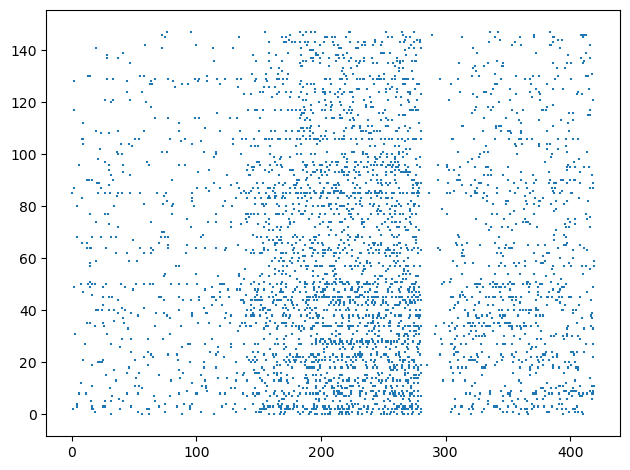

In [2]:
with open(r'D:\calcium imaging\220930_C_DIV17_GCaMP6f\cs3PDBu_above_baseline\DIV17_cs3_baseline2PDBu2CNQX\DIV17_cs3_baseline2PDBu2CNQXDur420sInt550msBin550ms_filtered.pkl', 'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
df_cell_stats
# i=0 #to plot w/o spaces
for i, idx in enumerate(df_cell_stats['NeuronId']):
#     print(idx)
    plt.eventplot(df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'],lineoffsets=i,linelength=0.8)
#     i+=1
plt.tight_layout()

In [ ]:
## here I generate a dictionary that contains nap.Tsd (timeseries data) objects, which is easy to handle when you want to do
## so you can later all each neurons with their ids

my_tsd = {}
for idx in df_cell_stats['NeuronId'][0:]:
    my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'][idx],
                          d=df_cell_stats[df_cell_stats['NeuronId']==idx]['Amplitudes'][idx],time_units='s')

    
## Define the intervals you want to extract, here the unit is in second, so might be different from frames.
## You can later use the .restrict(intervals) function on the nap.Tsd object to only extract the events 
## happening in this period of time.

Interval_1 = nap.IntervalSet(0,150)
Interval_2 = nap.IntervalSet(150,290)
Interval_3 = nap.IntervalSet(290,450)
    
interval_set = [Interval_1,
                Interval_2,
                Interval_3] 

## you can change this to any other interval values
## There will be error messages when there is not spikes in the list after the restriction, 
## but you can just ignore that. Here I shut that down in this cell.

import warnings
warnings.filterwarnings('ignore')
## just to get rid of the warnings


## plot spike time vs amplitude in each intervals
plt.figure()
for i in range(3):
    plt.title(f'interval {i+1}')
    for idx in my_tsd.keys():
        plt.plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
    plt.ylabel('Amplitude')
    plt.xlabel('Spike time (s)')
    plt.tight_layout()
    plt.show()

## You can then just group the amplitude as you want for later analysis

In [ ]:
transient_count = []
for idx in my_tsd.keys():
    transient_count.append(my_tsd[idx].restrict(interval_set[0]).shape[0])

In [ ]:
transient_count = []
for idx in my_tsd.keys():
    transient_count.append(my_tsd[idx].restrict(interval_set[0]).shape[0])

In [ ]:
# FOR LARISSA
""" We need to get the count of the total number of synapses present in a certain interval (e.g. len(transient_count) maybe
        BUT it needs to ignore the rows where the count is 0 (which happens for a few synapses)

    secondly, we also need to get an average amplitude for each individual synapse detected so that we can plot these
    
    lastly, we need to build a pandas dataframe with the following column structure:
            
        
ROI # | transient_count | Average Amplitude | Frequency (transient # divided by # seconds) | condition (e.g. Baseline vs PDBu vs CNQX) | filename
"""

In [ ]:
#convert to pandas and build dataframe

pd.DataFrame(#insert variable)